# This notebook focuses on the Exploratory Data Analysis of the *Dry Bean Dataset*

The dry bean dataset has multiple classes of Beans with multiple features

# Workflow Stages
1. Importing required libraries and dataset
2. Exploring dataset(features, classes)
3. Plotting Correlation heatmap for all features and scatterplots
4. Detection outliers with the help of boxplot and plotting distribution curve
5. Removing outliers and plotting new distribution curve



# 1. Importing required libraries and dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import pandas as pd
import os
os.chdir("/content/drive/MyDrive/kaggle/Dry Bean Dataset")
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import skew

Mounted at /content/drive


In [2]:
df = pd.read_excel('Dry_Bean_Dataset.xlsx')

## 2. Exploring dataset(features, classes)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

As we can see that there are 16 features and there are no missing values. All features are numerical. Let us explore more about Classes in the dataset.

In [4]:
print(df.Class.unique())
print(df.Class.value_counts())

['SEKER' 'BARBUNYA' 'BOMBAY' 'CALI' 'HOROZ' 'SIRA' 'DERMASON']
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64


There are 7 classes of Beans with Dermason having maximum dataset and Bombay minimum

In [5]:
mean = df.groupby('Class').mean()
std = df.groupby('Class').std()
print(mean)
print(std)

                   Area    Perimeter  ...  ShapeFactor3  ShapeFactor4
Class                                 ...                            
BARBUNYA   69804.133132  1046.105764  ...      0.649144      0.995739
BOMBAY    173485.059387  1585.619079  ...      0.629195      0.991841
CALI       75538.211043  1057.634282  ...      0.573022      0.990584
DERMASON   32118.710942   665.209536  ...      0.671636      0.996914
HOROZ      53648.508817   919.859676  ...      0.491791      0.991926
SEKER      39881.299951   727.672440  ...      0.805149      0.998383
SIRA       44729.128604   796.418737  ...      0.636358      0.995385

[7 rows x 16 columns]
                  Area   Perimeter  ...  ShapeFactor3  ShapeFactor4
Class                               ...                            
BARBUNYA  10265.386454   89.629646  ...      0.054347      0.002649
BOMBAY    23327.688116  115.900954  ...      0.049052      0.004454
CALI       9379.881487   67.615137  ...      0.031346      0.004456
DERMASO

With the help of mean and standard deviation we can see average values of the features of a class and how much the values are deviated from mean. This might be helpful as during predictive analysis we can face high variance problem.

## 3. Plotting Correlation heatmap for all features and scatterplots

[]

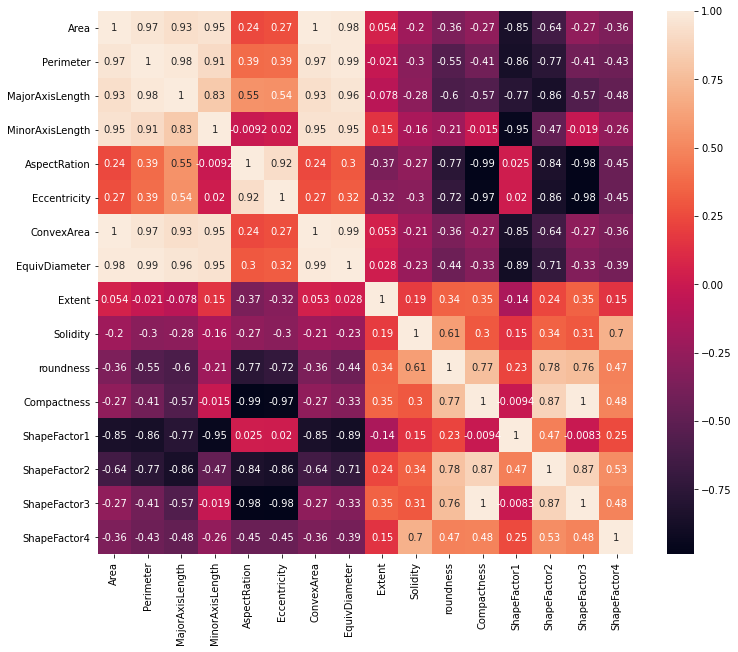

In [6]:
plt.figure(figsize = (12,10))
sns.heatmap(df.corr(), annot = True)
plt.plot()

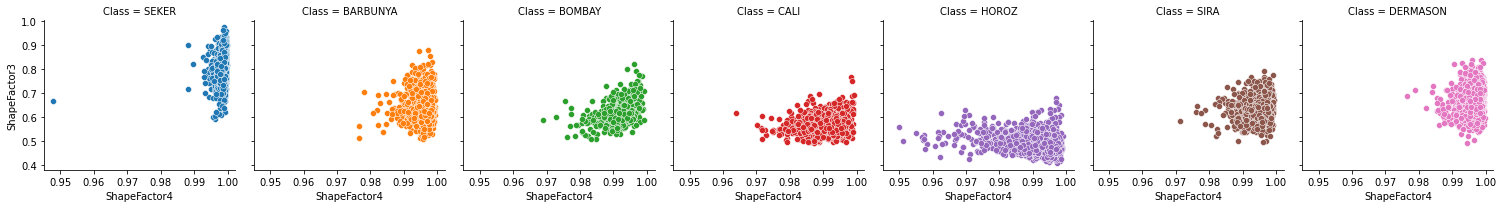

In [7]:
grid = sns.FacetGrid(df, col = "Class", hue = "Class", col_wrap = 7)
grid.map(sns.scatterplot,  "ShapeFactor4", "ShapeFactor3")

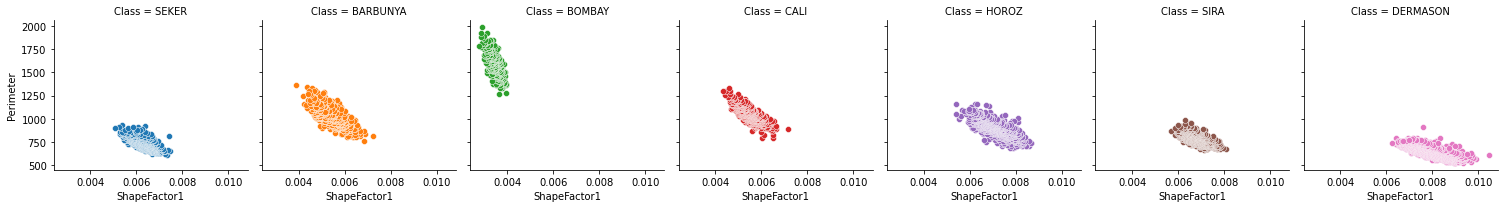

In [8]:
grid = sns.FacetGrid(df, col = "Class", hue = "Class", col_wrap = 7)
grid.map(sns.scatterplot,  "ShapeFactor1", "Perimeter")

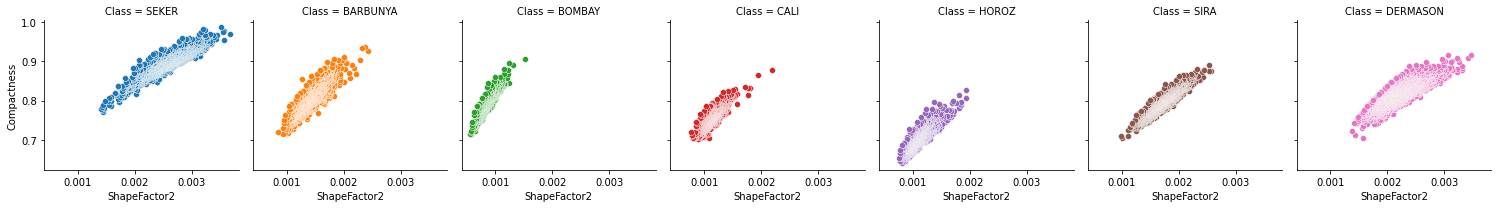

In [9]:
grid = sns.FacetGrid(df, col = "Class", hue = "Class", col_wrap = 7)
grid.map(sns.scatterplot,  "ShapeFactor2", "Compactness")

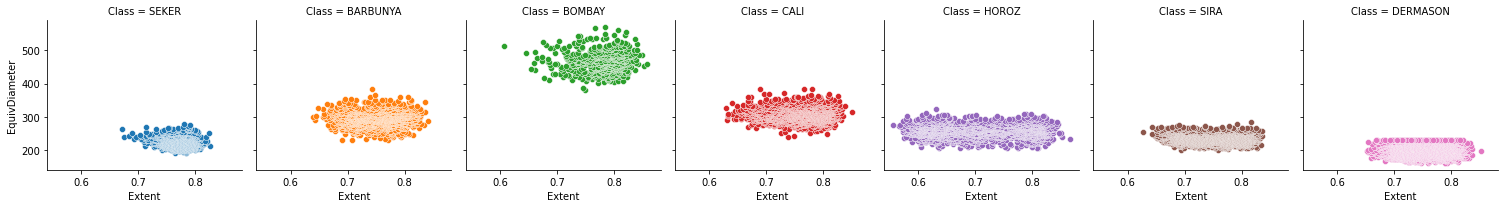

In [10]:
grid = sns.FacetGrid(df, col = "Class", hue = "Class", col_wrap = 7)
grid.map(sns.scatterplot,  "Extent", "EquivDiameter")

We can see the correlation between different features

SF1 - Perimeter -- Negatively Correlated 

SF2 - Compactness -- Positively Correlated

SF4 - SF3 -- Positively Correlated with small value

Extent - EquivDiameter -- Not correlated

Similarly we can check this for other features also. This is helpful to understand the correlation between features and to check out if data has outliers


## 4. Detection outliers with the help of boxplot and plotting distribution curve

BoxPlot of Feature 1-

Area Perimeter MajorAxisLength MinorAxisLength

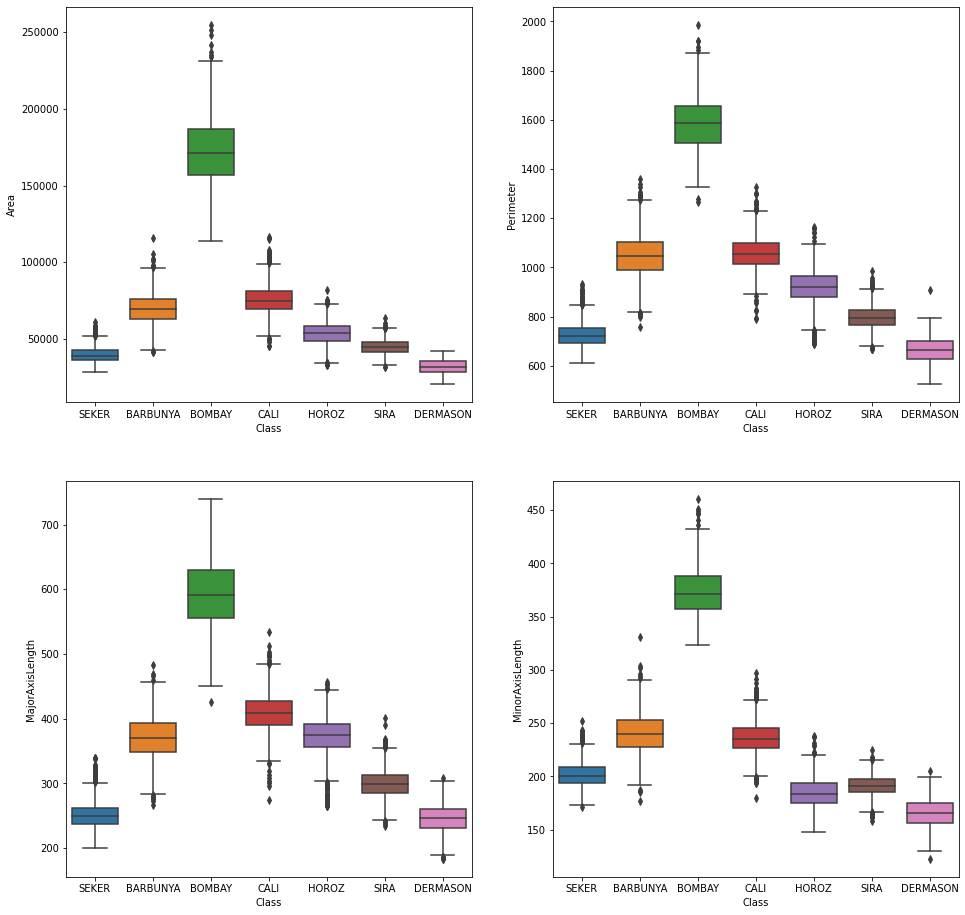

In [11]:
plt.figure(figsize=(16,16))
plt.subplot(2,2,1)
sns.boxplot(x='Class',y='Area',data=df)
plt.subplot(2,2,2)
sns.boxplot(x='Class',y='Perimeter',data=df)
plt.subplot(2,2,3)
sns.boxplot(x='Class',y='MajorAxisLength',data=df)
plt.subplot(2,2,4)
sns.boxplot(x='Class',y='MinorAxisLength',data=df)

BoxPlot of Feature 5-8

AspectRation	Eccentricity	ConvexArea	EquivDiameter	

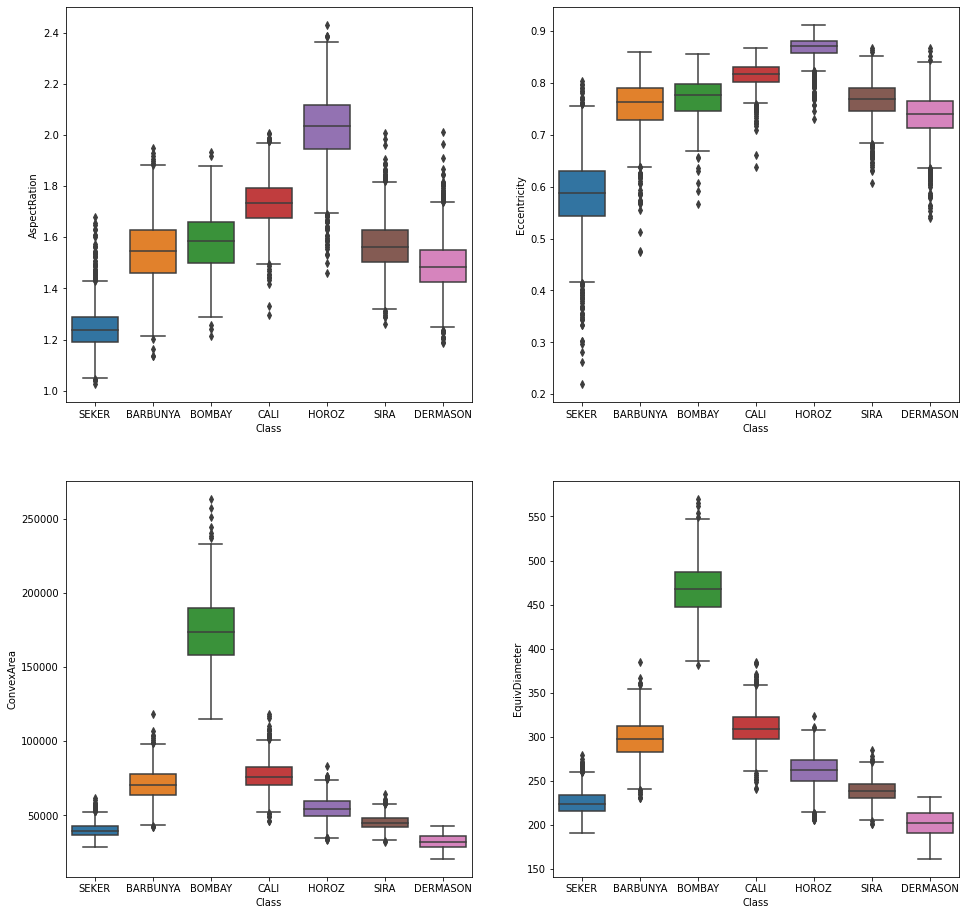

In [12]:
plt.figure(figsize=(16,16))
plt.subplot(2,2,1)
sns.boxplot(x='Class',y='AspectRation',data=df)
plt.subplot(2,2,2)
sns.boxplot(x='Class',y='Eccentricity',data=df)
plt.subplot(2,2,3)
sns.boxplot(x='Class',y='ConvexArea',data=df)
plt.subplot(2,2,4)
sns.boxplot(x='Class',y='EquivDiameter',data=df)

BoxPlot of Feature 9-12

Extent	Solidity	roundness	Compactness

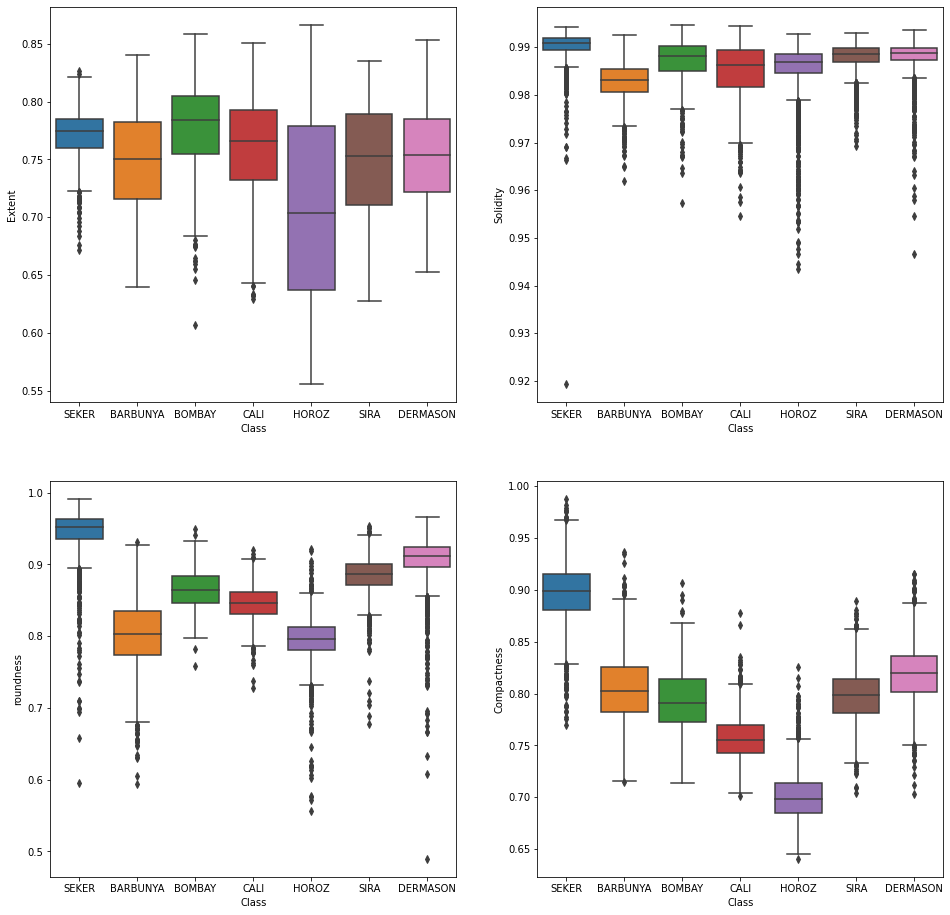

In [13]:
plt.figure(figsize=(16,16))
plt.subplot(2,2,1)
sns.boxplot(x='Class',y='Extent',data=df)
plt.subplot(2,2,2)
sns.boxplot(x='Class',y='Solidity',data=df)
plt.subplot(2,2,3)
sns.boxplot(x='Class',y='roundness',data=df)
plt.subplot(2,2,4)
sns.boxplot(x='Class',y='Compactness',data=df)

BoxPlot of Feature 13-16

ShapeFactor1	ShapeFactor2	ShapeFactor3	ShapeFactor4

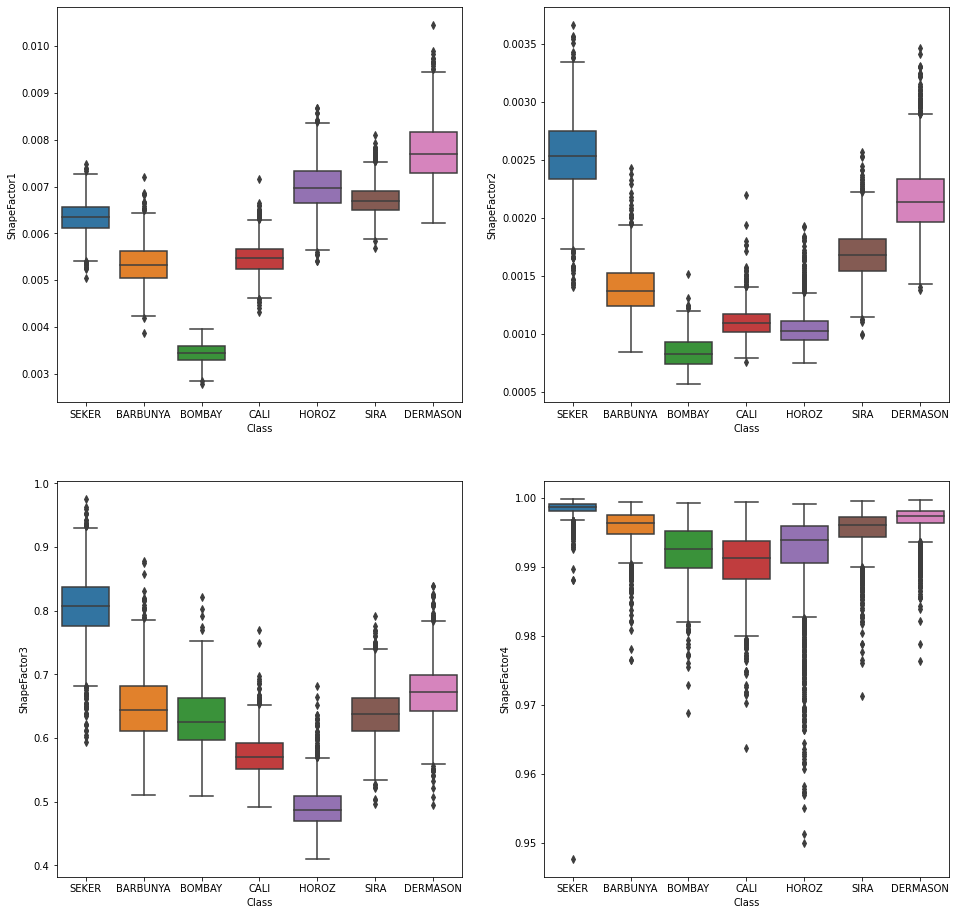

In [14]:
plt.figure(figsize=(16,16))
plt.subplot(2,2,1)
sns.boxplot(x='Class',y='ShapeFactor1',data=df)
plt.subplot(2,2,2)
sns.boxplot(x='Class',y='ShapeFactor2',data=df)
plt.subplot(2,2,3)
sns.boxplot(x='Class',y='ShapeFactor3',data=df)
plt.subplot(2,2,4)
sns.boxplot(x='Class',y='ShapeFactor4',data=df)

As we can see from the plots there are many outliers in **ShapeFactor4**, **Solidity**, **ConvexArea**, etc.

From these observation we can say that the distribution curves of these features will be highly skewed. Let us confirm by plotting the distribution curves.

<Figure size 864x720 with 0 Axes>

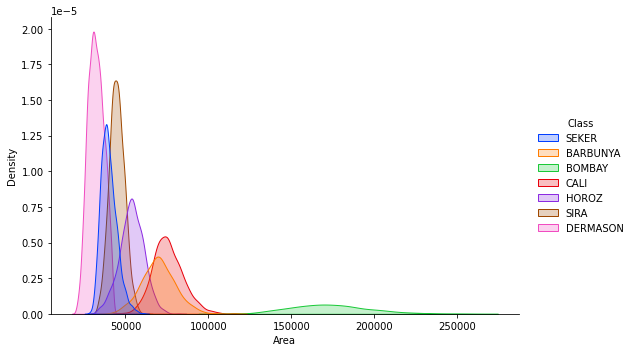

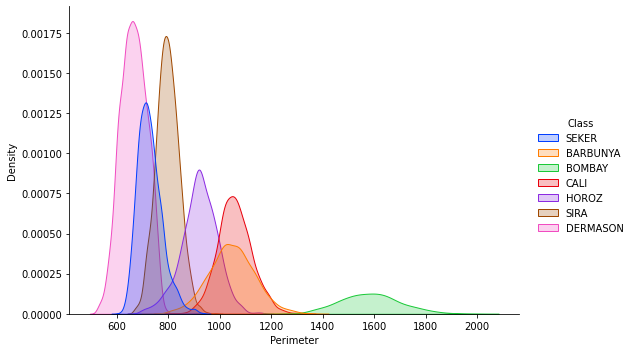

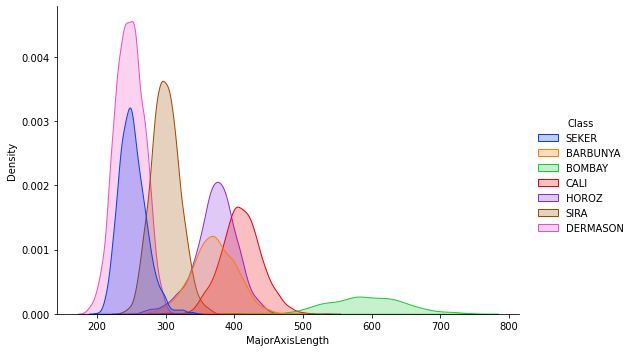

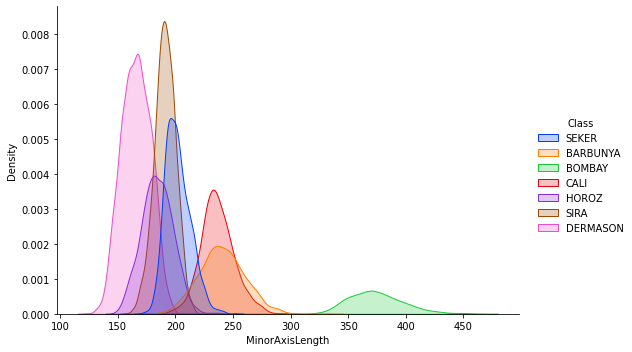

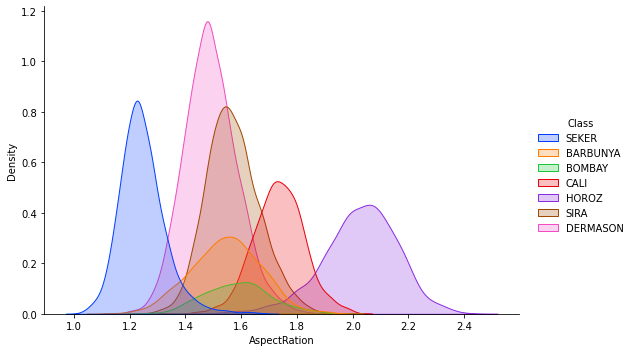

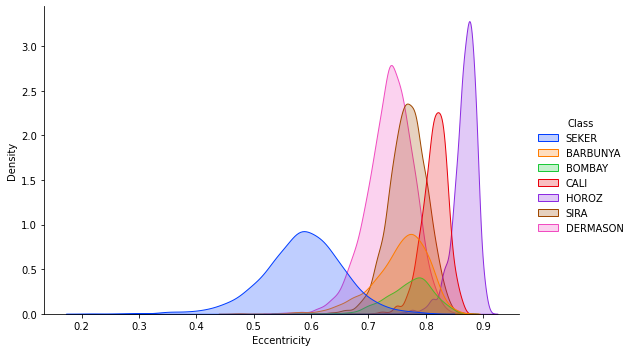

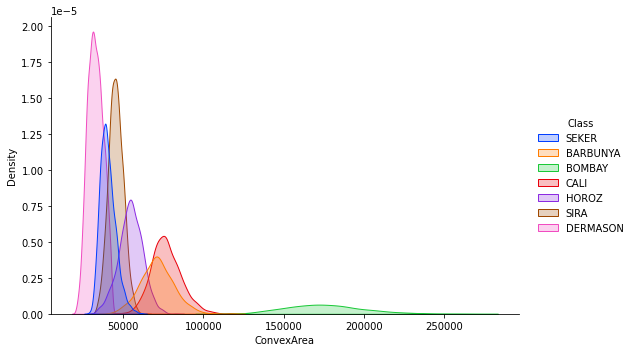

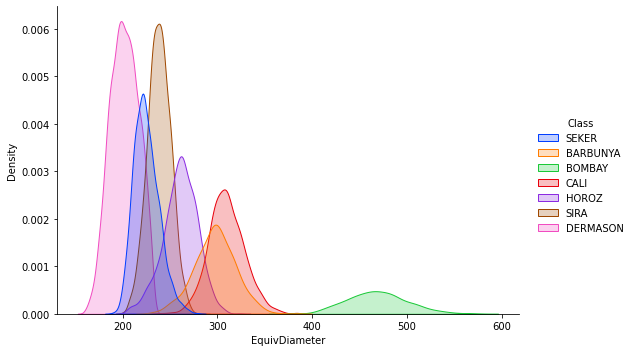

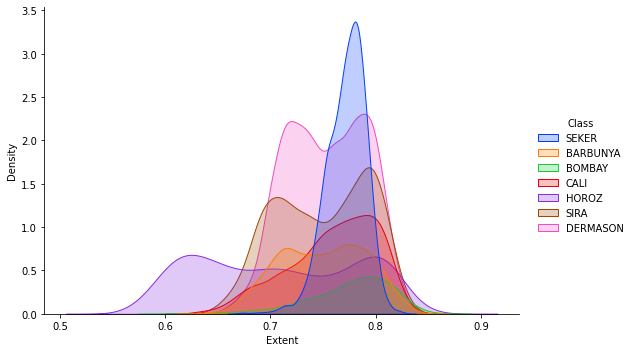

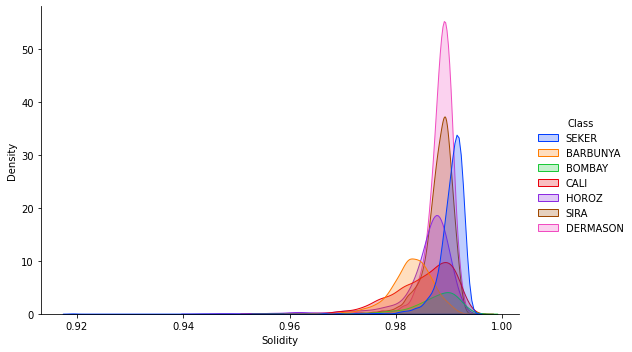

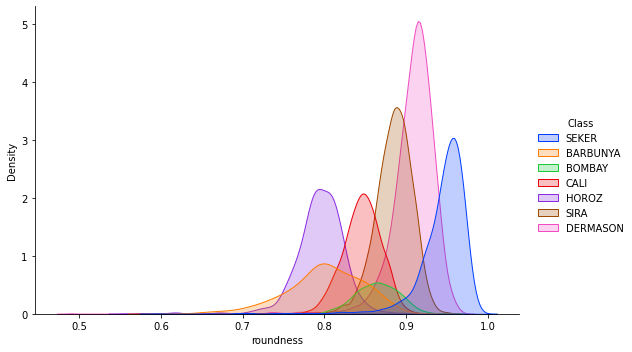

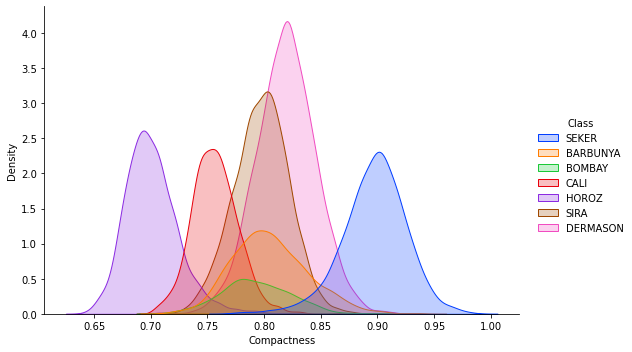

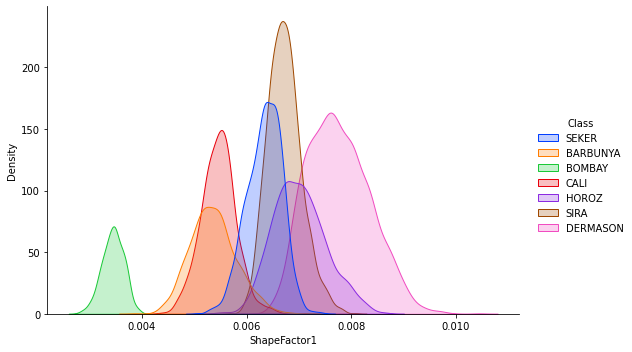

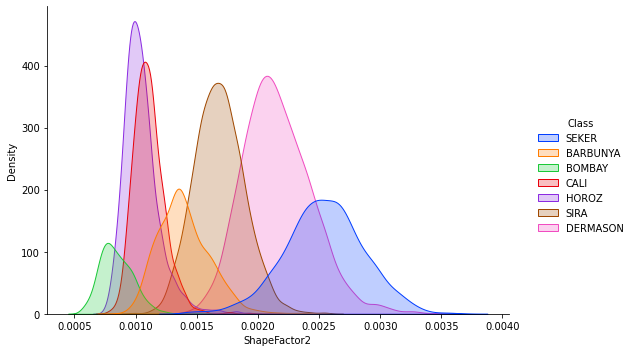

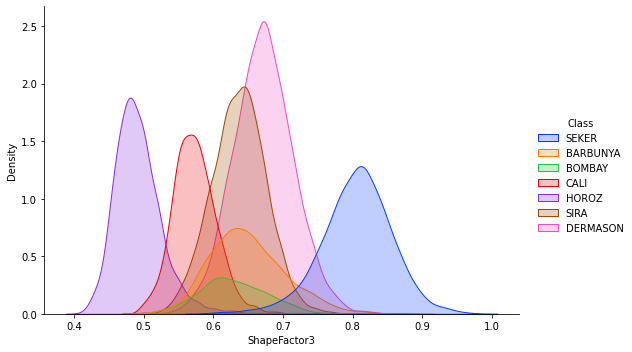

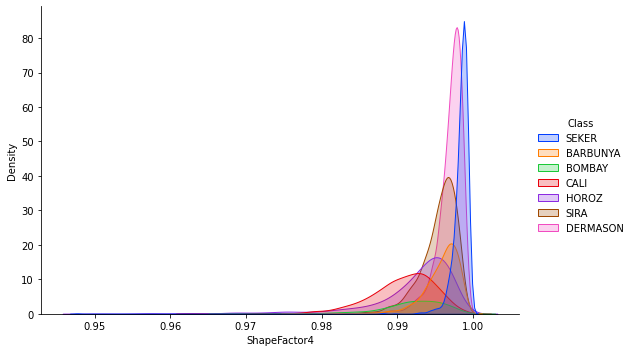

In [15]:
plt.figure(figsize = [12,10])
for c in df.columns[0:16]:
  sns.displot(data = df, x = c, hue = 'Class', kind='kde', fill=True, palette=sns.color_palette('bright')[:7], height=5, aspect=1.5)



In [16]:
skewness = []
for c in df.columns[0:16]:
  skewness.append(df[c].skew())
  print(c,"=", df[c].skew())

Area = 2.9529309714284606
Perimeter = 1.6261235244866195
MajorAxisLength = 1.357815283538504
MinorAxisLength = 2.2382105396094616
AspectRation = 0.582573399224162
Eccentricity = -1.0628239308013614
ConvexArea = 2.9418211110165506
EquivDiameter = 1.9489576095229233
Extent = -0.8953484282439236
Solidity = -2.5500931076087867
roundness = -0.6357489499307082
Compactness = 0.03711545824042349
ShapeFactor1 = -0.5341405429848687
ShapeFactor2 = 0.30122592966591644
ShapeFactor3 = 0.24248092669352575
ShapeFactor4 = -2.7594829116803807


Let us remove the outliers and decrease the skewness.

Generall to remove the outliers we can delete them from the dataset or change their values to median. Here I am changing 10 percentile of flank data points to the same value as of the points at the flank. 

## 5. Removing outliers and plotting new distribution curve

In [ ]:
arr = [];
for i in df.index:
  if(df['Class'][i] == 'HOROZ'):
      arr.append(df['ShapeFactor4'][i])
arr = np.asarray(arr)
skew(arr)
lt = np.quantile(arr, 0.10)
rt = np.quantile(arr, 0.90)
for i in df.index:
  if(df['Class'][i] == 'HOROZ'):
    if(df['ShapeFactor4'][i] < lt):
      df['ShapeFactor4'][i] = lt
    if(df['ShapeFactor4'][i] > rt):
      df['ShapeFactor4'][i] = rt

arr = [];
for i in df.index:
  if(df['Class'][i] == 'SEKER'):
      arr.append(df['roundness'][i])
arr = np.asarray(arr)
skew(arr)
lt = np.quantile(arr, 0.10)
rt = np.quantile(arr, 0.90)
for i in df.index:
  if(df['Class'][i] == 'SEKER'):
    if(df['roundness'][i] < lt):
      df['roundness'][i] = lt
    if(df['roundness'][i] > rt):
      df['roundness'][i] = rt

arr = [];
for i in df.index:
  if(df['Class'][i] == 'HOROZ'):
      arr.append(df['roundness'][i])
arr = np.asarray(arr)
skew(arr)
lt = np.quantile(arr, 0.10)
rt = np.quantile(arr, 0.90)
for i in df.index:
  if(df['Class'][i] == 'HOROZ'):
    if(df['roundness'][i] < lt):
      df['roundness'][i] = lt
    if(df['roundness'][i] > rt):
      df['roundness'][i] = rt

arr = [];
for i in df.index:
  if(df['Class'][i] == 'HOROZ'):
      arr.append(df['Solidity'][i])
arr = np.asarray(arr)
skew(arr)
lt = np.quantile(arr, 0.10)
rt = np.quantile(arr, 0.90)
for i in df.index:
  if(df['Class'][i] == 'HOROZ'):
    if(df['Solidity'][i] < lt):
      df['Solidity'][i] = lt
    if(df['Solidity'][i] > rt):
      df['Solidity'][i] = rt

The skewness is quite reduced without much loss of data. Let us again plot the distribution curves of these features

<Figure size 864x720 with 0 Axes>

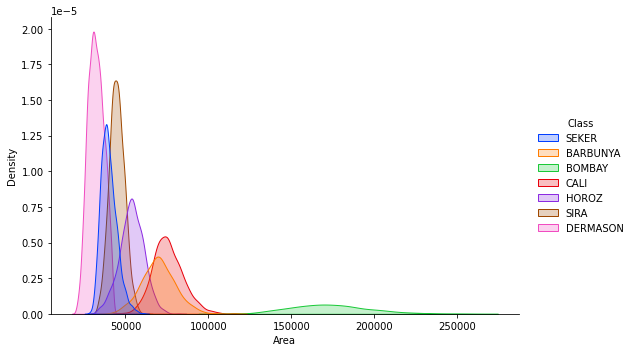

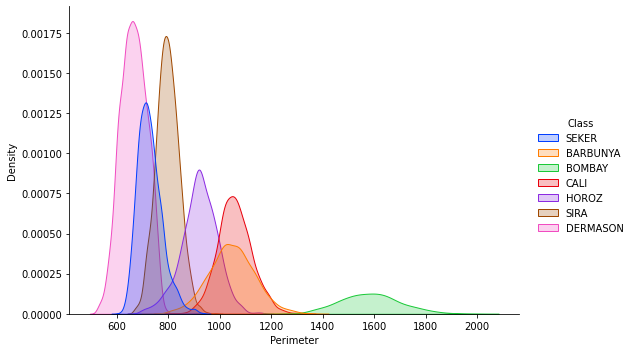

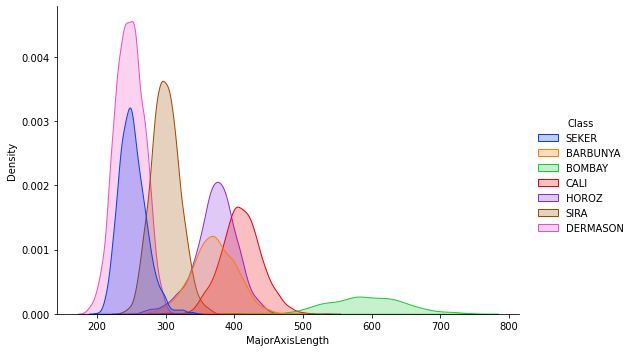

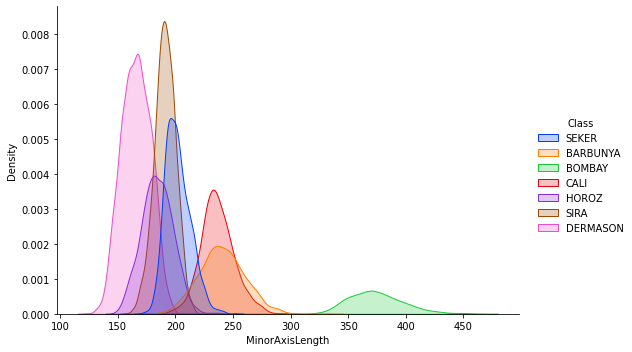

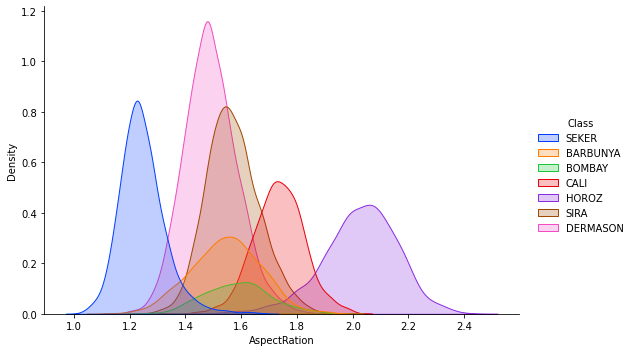

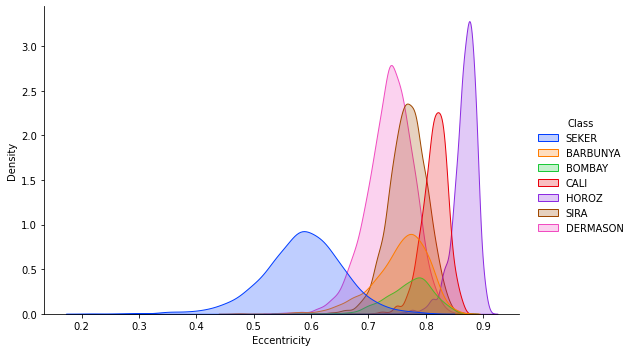

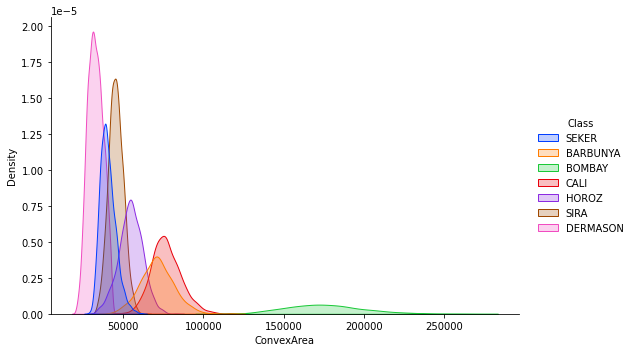

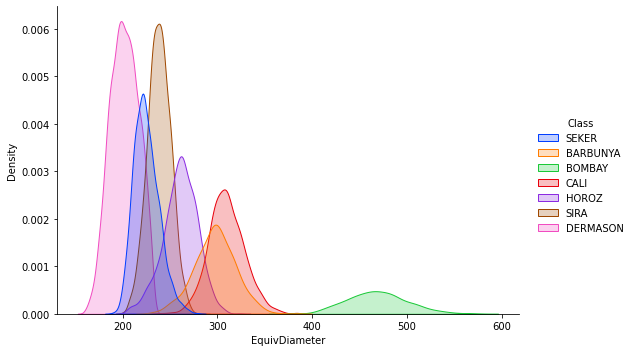

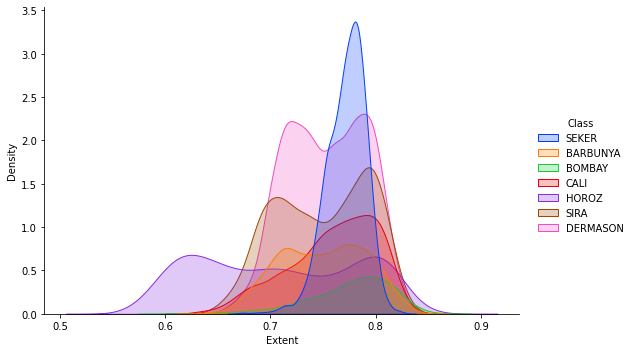

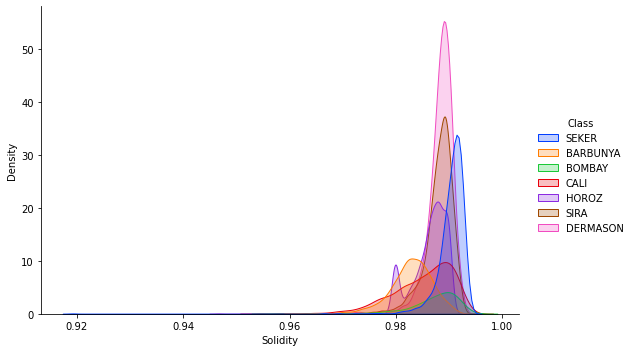

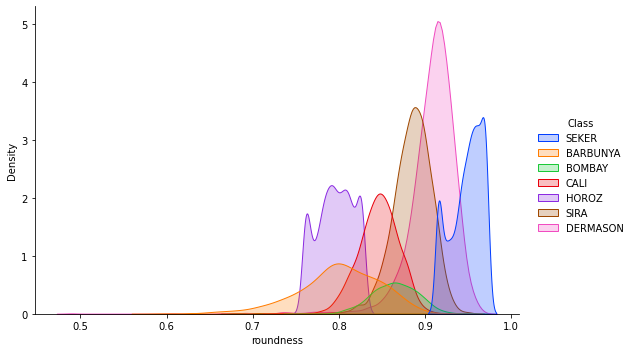

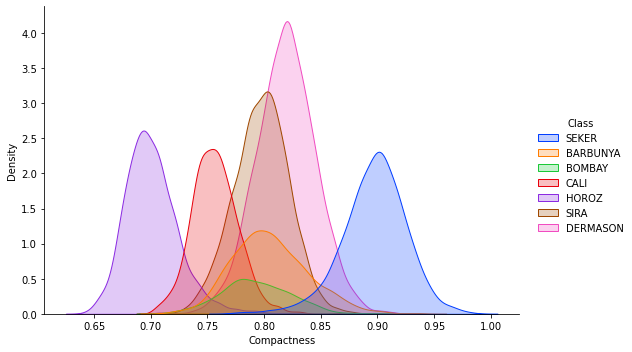

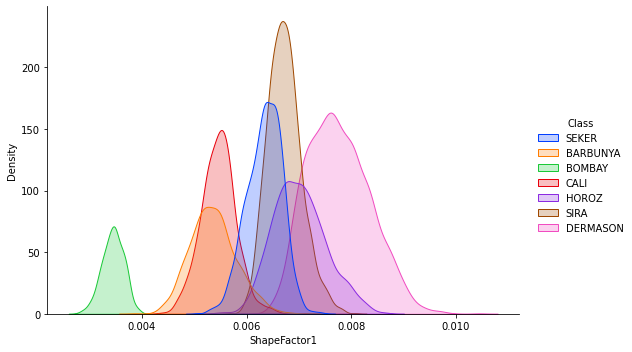

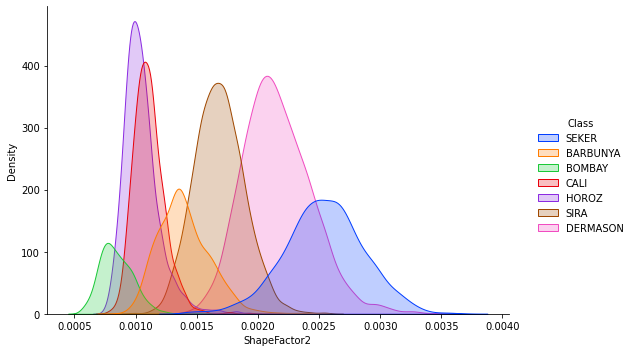

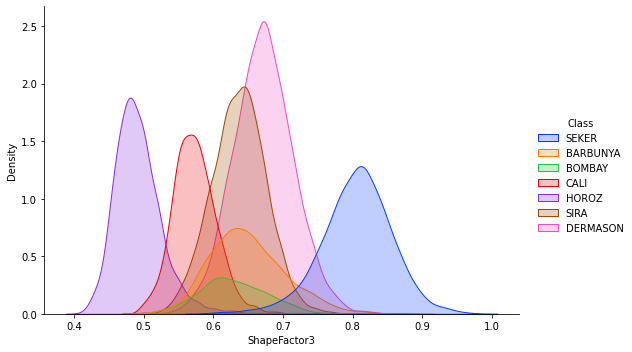

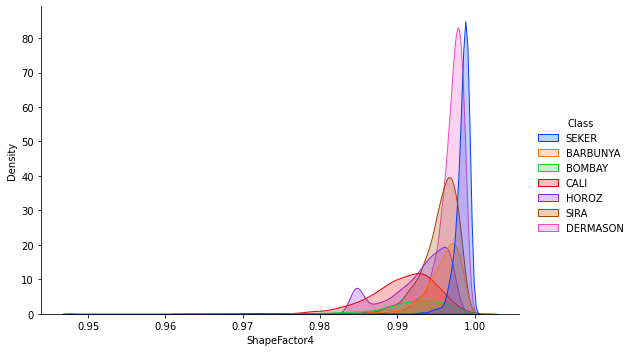

In [18]:
plt.figure(figsize = [12,10])
for c in df.columns[0:16]:
  sns.displot(data = df, x = c, hue = 'Class', kind='kde', fill=True, palette=sns.color_palette('bright')[:7], height=5, aspect=1.5)

In [19]:
# Saving the data for predictive analysis

file_name = 'Dry_Bean_Dataset_2.xlsx'
datatoexcel = pd.ExcelWriter(file_name)
df.to_excel(datatoexcel)
datatoexcel.save()